In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import math
import pandas as pd
from collections import Counter

# 在console内直接生成图像
%matplotlib inline 

In [2]:
data, target = load_iris(return_X_y=True, as_frame=True)
column = np.array(data.columns)

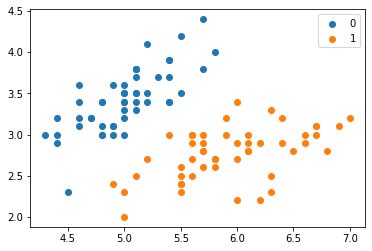

In [3]:
plt.scatter(data[:50][column[0]], data[:50][column[1]],label='0')
plt.scatter(data[50:100][column[0]], data[50:100][column[1]],label='1')

plt.legend()

In [4]:
data = data.values
target = target[0:100]

In [5]:
# 逻辑斯谛回归模型
class LR:
    def __init__(self, max_iter=200, l_rate=0.01, conv = 0.002):
        self.max_iter = max_iter  # 最大迭代次数
        self.l_rate = l_rate  # 学习率
        self.conv = conv  # 判断收敛的损失函数差值
    
    def sigmoid(self, x):  # sigmoid激活函数：g(x) = 1 / (1 + e^(-w·x))
        return 1 / (1 + np.exp(- np.dot(self.w, x)))
        
    def sigmoid_matrix_res(self, x):  # 多组x计算sigmoid函数得到矩阵结果
        res = np.zeros(x.shape[0])  # x:(m,n), w:(n,1), res:(m,1)
        for i in range(x.shape[0]):
            res[i] = self.sigmoid(x[i])
        return res
        
    def fit(self, x, y):
        dim  = x.shape[1]+1  
        self.w = np.zeros(dim)  # w初始维度为{x_i}特征维度 + 1
        b = np.ones(x.shape[0])
        x = np.column_stack((x, b))  # x最后增加一列全 1，使得可以直接计算 z = w·x
        iteration = 0
        while iteration < self.max_iter:
            old_loss = self.loss(x, y)  # 计算当前损失函数
            #delta = y - self.sigmoid_matrix_res(x)  # 导数
            #for j in range(dim):
            #    self.w[j] = self.w[j] + self.l_rate * np.sum(delta * x[:, j])
            for i in range(len(x)):
                result = self.sigmoid(x[i])
                error = y[i] - result
                self.w += self.l_rate * error * np.transpose(x[i])  # 梯度上升
                
            new_loss = self.loss(x, y)  # 计算梯度上升后的损失函数
            
            if math.fabs(old_loss - new_loss) < self.conv:
                print("收敛！")
                print("损失值为：", old_loss)
                break
            print("当前第%d轮，损失值为%f" % (iteration, new_loss))
            iteration += 1
            
    def predict(self, x):
        return self.sigmoid(x) > 0.5
        
    def loss(self, x, y):
        L = 0  # 损失值
        for i in range(len(x)):
            temp = self.sigmoid(x[i])
            L += y[i] * math.log(temp, 2) + (1 - y[i]) * math.log((1 - temp), 2)  # 交叉熵损失
        return L
            

In [6]:
lr = LR()
lr.fit(data[0:100, 0:2], target[0:100])
# print(lr.w)

x_points = np.linspace(4, 7, 50)
y_points = -(lr.w[0] * x_points + lr.w[-1]) / lr.w[1]

plt.plot(x_points, y_points) 
plt.scatter(data[:50][:,0], data[:50][:,1],label='0')
plt.scatter(data[50:100][:,0], data[50:100][:,1],label='1')

plt.legend()

NameError: name 'X' is not defined